In [1]:
import math
import numpy as np
import ziaplot as zp

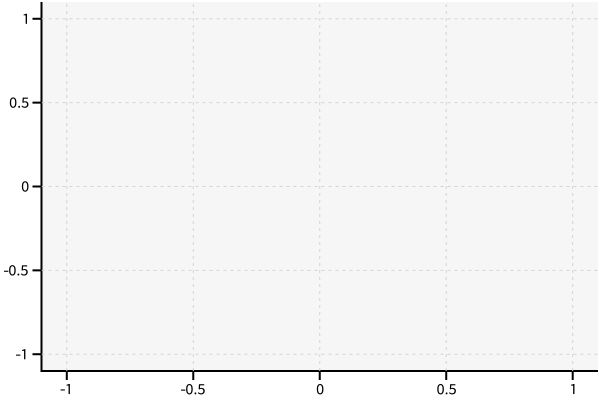

In [2]:
# Blank axis should draw ok
zp.AxesPlot()

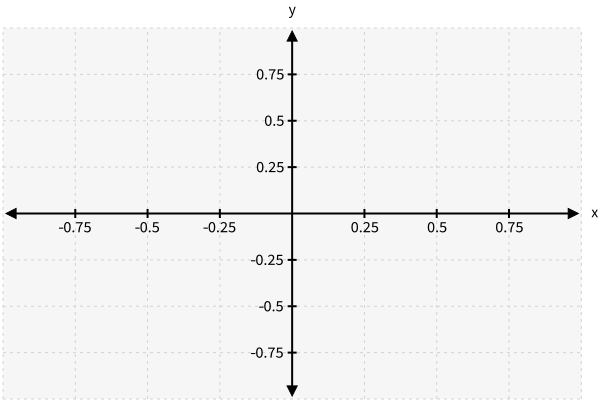

In [3]:
zp.AxesGraph()

In [4]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

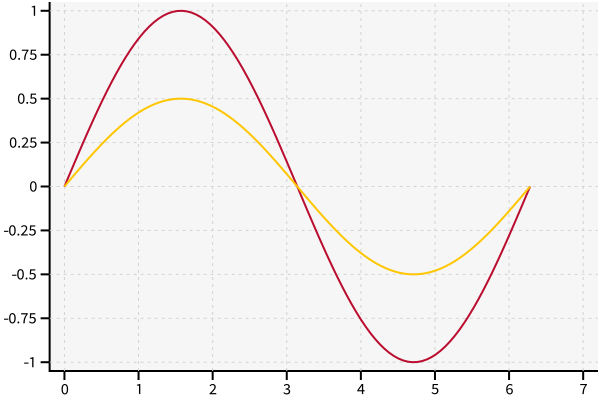

In [5]:
# Context Manager
with zp.AxesPlot():
    zp.Plot(x, y)
    zp.Plot(x, y/2)

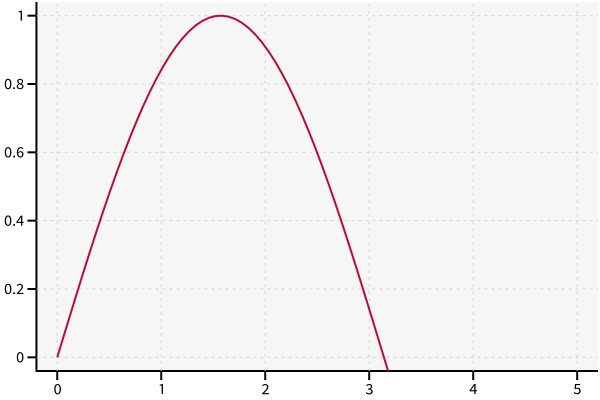

In [6]:
# Manual range
p = zp.AxesPlot()
p += zp.Plot(x, y)
p.xrange(0,5)
p.yrange(0,1)

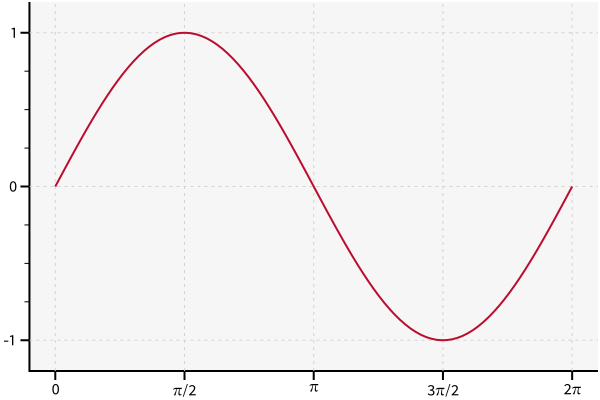

In [7]:
# Manual ticks
p = zp.AxesPlot()
p += zp.Plot(x, y)
p.xticks((0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi), ('0', 'π/2', 'π', '3π/2', '2π'))
p.yticks((-1, 0, 1), minor=(-.75, -.5, -.25, .25, .5, .75))
p

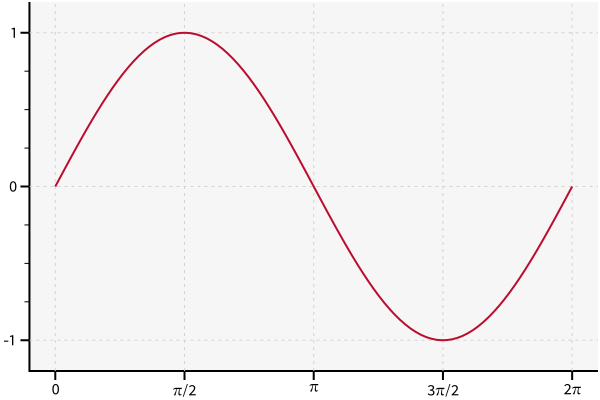

In [8]:
# Manual ticks - Context Manager
with zp.AxesPlot() as p:
    zp.Plot(x, y)
    p.xticks((0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi), ('0', 'π/2', 'π', '3π/2', '2π'))
    p.yticks((-1, 0, 1), minor=(-.75, -.5, -.25, .25, .5, .75))

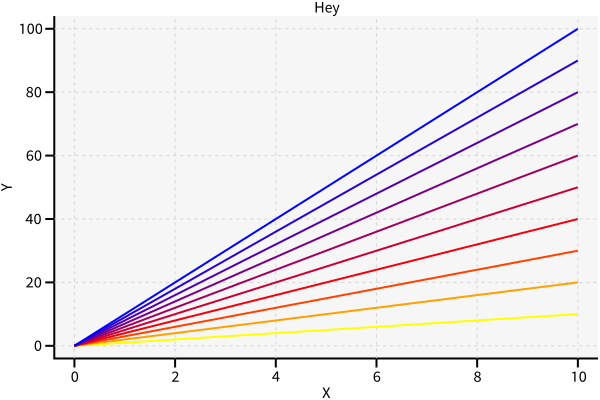

In [9]:
# Colorfade
x = np.linspace(0, 10, 10)
y = x
p = zp.AxesPlot(title='Hey', xname='X', yname='Y')
p.colorfade('#FFFF00', '#FF0000', '#0000FF', stops=(0, .3, 1))
for i in range(10):
    p += zp.Plot(x, y*(i+1))
p

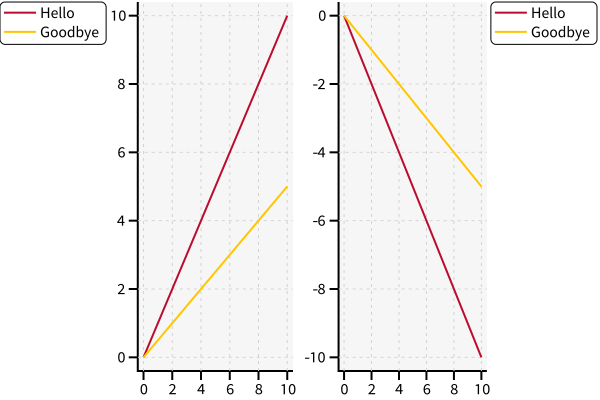

In [10]:
# Legend
p = zp.AxesPlot(legend='left')
p += zp.Plot(x, y).name('Hello')
p += zp.Plot(x, y/2).name('Goodbye')
p2 = zp.AxesPlot(legend='right')
p2 += zp.Plot(x, -y).name('Hello')
p2 += zp.Plot(x, -y/2).name('Goodbye')
zp.LayoutH(p, p2)

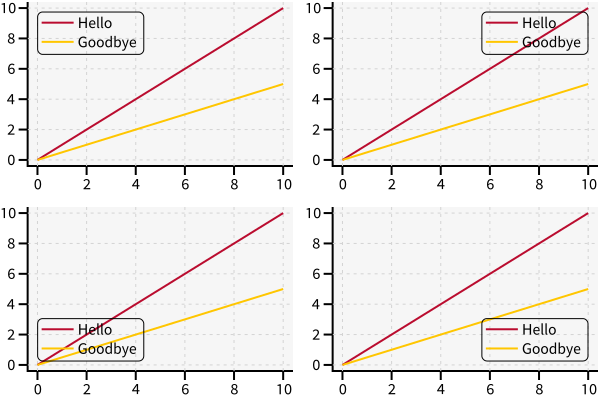

In [11]:
# Legend Locations (AxesPlot)
line1 = zp.Plot(x, y).name('Hello')
line2 = zp.Plot(x, y/2).name('Goodbye')

p = zp.AxesPlot(legend='topleft')
p += line1
p += line2
p2 = zp.AxesPlot(legend='topright')
p2 += line1
p2 += line2
p3 = zp.AxesPlot(legend='bottomleft')
p3 += line1
p3 += line2
p4 = zp.AxesPlot(legend='bottomright')
p4 += line1
p4 += line2

zp.LayoutGrid(p, p2, p3, p4, columns=2)

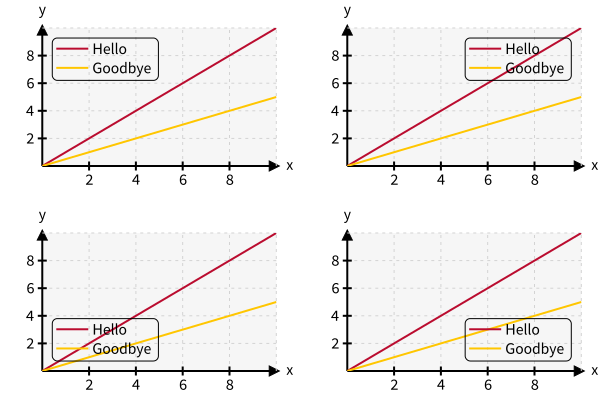

In [12]:
# Legend Locations (AxesGraph)
line1 = zp.Plot(x, y).name('Hello')
line2 = zp.Plot(x, y/2).name('Goodbye')

p = zp.AxesGraph(legend='topleft')
p += line1
p += line2
p2 = zp.AxesGraph(legend='topright')
p2 += line1
p2 += line2
p3 = zp.AxesGraph(legend='bottomleft')
p3 += line1
p3 += line2
p4 = zp.AxesGraph(legend='bottomright')
p4 += line1
p4 += line2

zp.LayoutGrid(p, p2, p3, p4, columns=2, gutter=0)

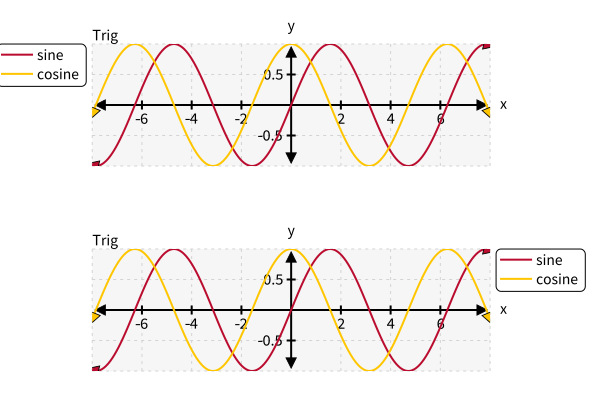

In [13]:
# AxesGraph and Function Plotting
p = zp.AxesGraph(title='Trig').xrange(-2*math.pi, 2*math.pi)
p += zp.Function(math.sin).endmarkers().name('sine')
p += zp.Function(math.cos).endmarkers().name('cosine')
p2 = zp.AxesGraph(title='Trig', legend='right').xrange(-2*math.pi, 2*math.pi)
p2 += zp.Function(math.sin).endmarkers().name('sine')
p2 += zp.Function(math.cos).endmarkers().name('cosine')
zp.LayoutV(p, p2)

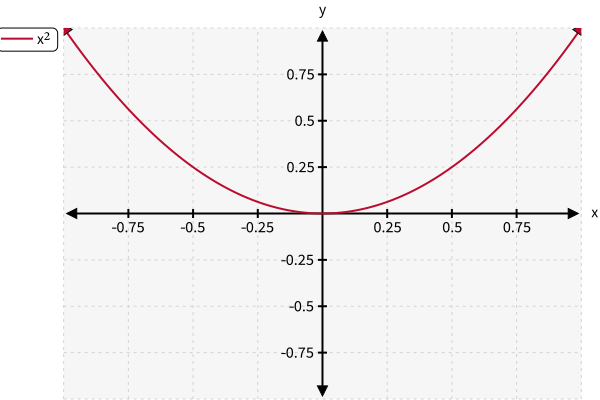

In [14]:
# Turn off centering
p = zp.AxesGraph(centerorigin=False)
p += zp.Function(lambda x: x**2).name('x²').endmarkers()
p

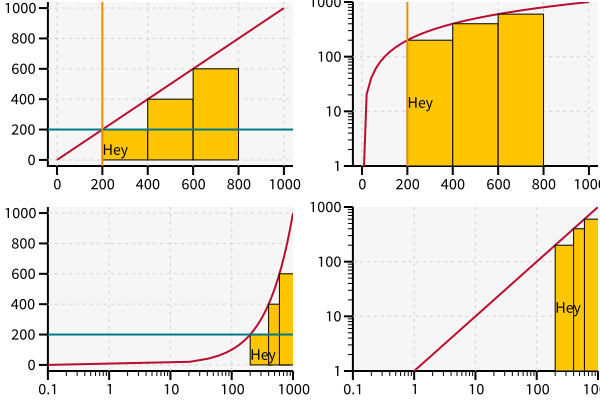

In [15]:
# Log scales

x2 = np.linspace(.1, 1000)
y2 = x2

line1 = zp.Plot(x2, y2)
line2 = zp.Bars([200, 400, 600], [200, 400, 600], align='left')
line3 = zp.Text(200, 10, 'Hey')
line4 = zp.HLine(200)
line5 = zp.VLine(200)

p1 = zp.AxesPlot()
p1 += line1
p1 += line2
p1 += line3
p1 += line4
p1 += line5

p2 = zp.AxesLogY()
p2 += line1
p2 += line2
p2 += line3
p2 += line4
p2 += line5

p3 = zp.AxesLogX()
p3 += line1
p3 += line2
p3 += line3
p3 += line4
p3 += line5

p4 = zp.AxesLogXY()
p4 += line1
p4 += line2
p4 += line3
p4 += line4
p4 += line5

zp.LayoutGrid(p1, p2, p3, p4, columns=2)

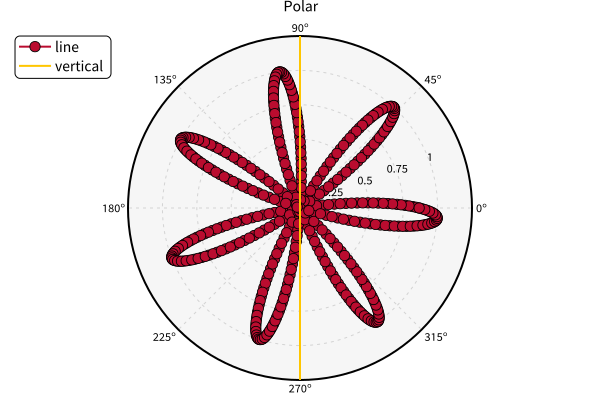

In [16]:
# Polar

th = np.linspace(0, 2*np.pi, 500)
r = np.cos(7*th+np.pi/6)
th = [math.degrees(t) for t in th]

p = zp.AxesPolar(legend='left', title='Polar', labeldeg=True)
p.style.polar.rlabeltheta = 20
p += zp.LinePolar(r, th, deg=True).name('line').marker('round', 6)
p += zp.VLine(0).name('vertical')
p.xrange(0, 1.1)
p

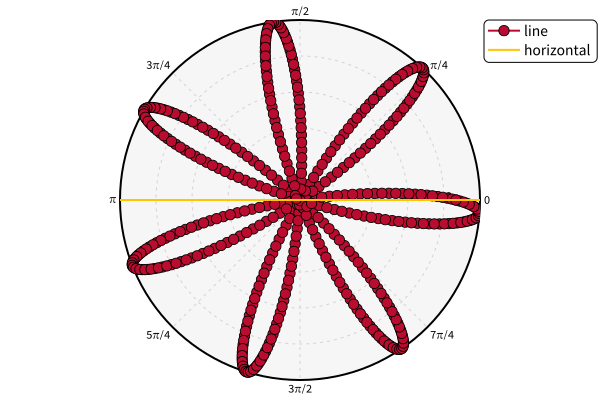

In [17]:
# Polar - pi labels
th = np.linspace(0, 2*np.pi, 500)
r = np.cos(7*th+np.pi/6)
th = [math.degrees(t) for t in th]
p = zp.AxesPolar(legend='right', labeldeg=False)
p += (q:= zp.LinePolar(r, th, deg=True).name('line').marker('round', 6))
p += zp.HLine(0).name('horizontal')
p

In [18]:
svg = p.imagebytes('svg')
pdf = p.imagebytes('pdf')
png = p.imagebytes('png')
eps = p.imagebytes('eps')

In [19]:
p.save('testplot.svg')